# Cell Complexes

<center><img src="cc.png" width=200px alt="default"/></center>

## Setup

In [1]:
import numpy as np

from toponetx import CellComplex as Cc

## Cell Complex

In mathematics, a *cell complex* is a space that is constructed by attaching lower-dimensional cells to a topological space to form a new space. The cells are attached to the space in a specific way, and the resulting space has a well-defined structure.

For example, a cell complex can be used to represent a simplicial complex, which is a collection of points, line segments, triangles, and higher-dimensional simplices that are connected in a specific way. Each simplex in the simplicial complex is called a cell, and the cell complex consists of all of these cells *and* the way they are connected.

In other words, a cell complex X is a mathematical structure consisting of a set of points (called vertices or 0-cells), a set of line segments (called edges or 1-cells), and a set of polygons (called faces or 2-cells), such that the vertices, edges, and faces are connected in a consistent way $[2]$.

The dimension of a cell c ∈ X is denoted by d(c), and the dimension of a cell complex is the largest dimension of one of its cells. $[1]$

For further reading on cell complexes, look at $[4]$. 

## Example of a Cell Complex

Two examples of cell complexes can be seen below. 

The diagram on the left is made up of vertices (0-cells) and edges (1-cells). The highest dimension cell in this example is a 1-cell so the dimension of this cell-complex is 1. This diagram has 6 1-cells and 5 0-cells.

The diagram on the right is made up of vertices (0-cells), edges (1-cells) and faces (2-cells). The highest dimension cell in this example is a 2-cell so the dimension of this cell-complex is 2. This diagram has 2 2-cells, 6 1-cells and 5 0-cells.

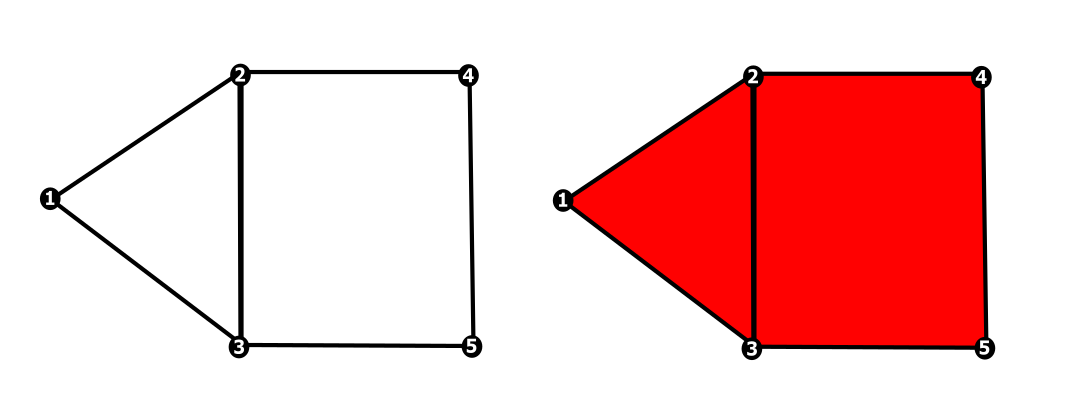

## Example Continued

In [2]:
example_1 = Cc()
print(example_1)

example_1.add_cell([1, 2], rank=1)
print(example_1)

example_1.add_cells_from([[1, 3], [2, 3], [2, 4], [3, 5], [4, 5]], rank=1)
print(example_1)

Cell Complex with 0 nodes, 0 edges  and 0 2-cells 
Cell Complex with 2 nodes, 1 edges  and 0 2-cells 
Cell Complex with 5 nodes, 6 edges  and 0 2-cells 


Using this code creates the cell complex from the diagram on the left, for now we are calling this example_1. 

The first line is the creation of the cell complex, printing this we can see that it is okay to have empty cell complexes.

Next we want to add the 1-cells and 0-cells, this can be done using the `add_cell` function on line 4 or the `add_cells_from` function on line 7. 

The `add_cell` function is a way of adding individual cells, the rank is where you determine the dimension of the cell you are adding. This can be seen in comparing the first and second lines in the outputs, the cell complex goes from having 0 nodes, edges and 2-cells to having 2 nodes and 1 edge. This is because we have added the edge $[1,2]$ which is made of two nodes 1,2 and one edge that connects them. 

The `add_cells_from` function is a way of adding multiple cells at once. This is done by defining a set of multiple cells with the function, instead of just an individual cell. Again, we need to define the rank of the cells, as this graph is just made up of nodes and edges the rank has always been 1. The addition of multiple cells can be seen in the difference between the second and third lines of the output, where there is an addition of 3 more nodes and 5 more edges. Comparing the third line of the output with the diagram, we can see that the code used to create example_1 does portray the left diagram above. 

If we had a node without any vertices attatched to it, say the edges $[1,4]$ and $[1,3]$ did not exist, we could add the node labelled as 1 with 

`example_1.add_cell([1], rank = 0)` 

as the dimension of a node is 0. 

In [3]:
example_2 = Cc()
print(example_2)

example_2.add_cell([1, 2, 3], rank=2)
print(example_2)

example_2.add_cells_from([[2, 4, 5, 3]], rank=2)
print(example_2)

Cell Complex with 0 nodes, 0 edges  and 0 2-cells 
Cell Complex with 3 nodes, 3 edges  and 1 2-cells 
Cell Complex with 5 nodes, 6 edges  and 2 2-cells 


For the diagram on the right, the same approach is used. However, this time, we have 2-cells. 

The first line, again, is creating the cell complex and naming it example_2. 

The fourth line is using the previous `add_cell` function to add the 2-cell $[1, 2, 3]$. From the diagram we know it is a 2-cell because the face is coloured in red, from the code we know it is a 2-cell because we have set the rank equal to 2. 

In the seventh line, we see that the `add_cells_from` function can be used for 2-cells too, and can be used even if only adding one. 

Looking at the second line of the output, we can see that the addition of a 2-cell increases not only that but also the nodes and edges, because the 2-cell is made up of nodes and edges too.

# Example 

Using the example from above titled `example_2`, we can look at using the incidence matrix $[3]$ to retrieve information about the cell complex. This is useful for retrieving information such as the list of edges and the list of 2-cells.

In [4]:
row, column, incidence_2 = example_2.incidence_matrix(rank=2, index=True)
print("edges:")
print(row)
print("2-cells:")
print(column)

edges:
{(1, 2): 0, (1, 3): 1, (2, 3): 2, (2, 4): 3, (3, 5): 4, (4, 5): 5}
2-cells:
{(1, 2, 3): 0, (2, 4, 5, 3): 1}


We can see from the output there are 6 edges, just like the example_2 diagram, and they have been numbered 0 to 5. The numbering system allows us to know which edges we are referring to for the up-Laplacian and down-Laplacian later on.

Similarly, we have the two 2-cells, and numbering for both of them. 

## up-Laplacian 

### Definition up-Laplacian

<ins>*Rank 0:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of 0-cells in the cell complex.

For i $\neq$ j,

$\mathcal{L}_{up}(i,j)$ = 0 if the i$^{th}$ 0-cell is not incident to j$^{th}$ 0-cell via a 1-cell incident to i$^{th}$ 0-cell, $\neq$ 0 if it is incident.

For i = j,

$\mathcal{L}_{up}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ 0-cell is incident to n 1-cells. 

<ins>*Rank 1:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of 1-cells in the cell complex.

For i $\neq$ j,

$\mathcal{L}_{up}(i,j)$ = 0 if the i$^{th}$ 1-cell is not incident to j$^{th}$ 1-cell via a 2-cell incident to i$^{th}$ 1-cell, $\neq$ 0 if it is incident.

For i = j, 

$\mathcal{L}_{up}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ 1-cell is incident to n 2-cells. 

### Example of up-Laplacian

To look at the application of different functions, we will be using `example_2` from above. We will also utilise the outputs of the incidence matrix to know which edges we may be referring to.

Looking at the diagram below we can follow the process of the up-Laplacian operator, this is an up-Laplacian of dimension 2 as it is going from edges to 2-cells back to edges.

So starting of with the diagram, we then choose an edge - in this case we have chosen the edge $[2,4]$. From the incidence matrix above, we know that this edge is edge numbered 3. Next, we go 'up' to the next dimension, of any 2-cells that are incident to this edge. In this case, it is incident to the 2-cell $[2, 4, 5, 3]$. Finally, we list the edges incident to the 2-cell $[2, 4, 5, 3]$ which are the edges $[2,3],[2,4],[3,5], [4,5]$. From the incidence matrix above we know that these are the edges numbered as 2, 3, 4 and 5. 

This is seen in the matrix below titled `laplacian_up_1`, as the fourth row is referring to our edge $[2,4]$ and we can see there are non-zero entries in the 2nd, 3rd, 4th and 5th columns of this row as those are the edges incident via the up-Laplacian. 

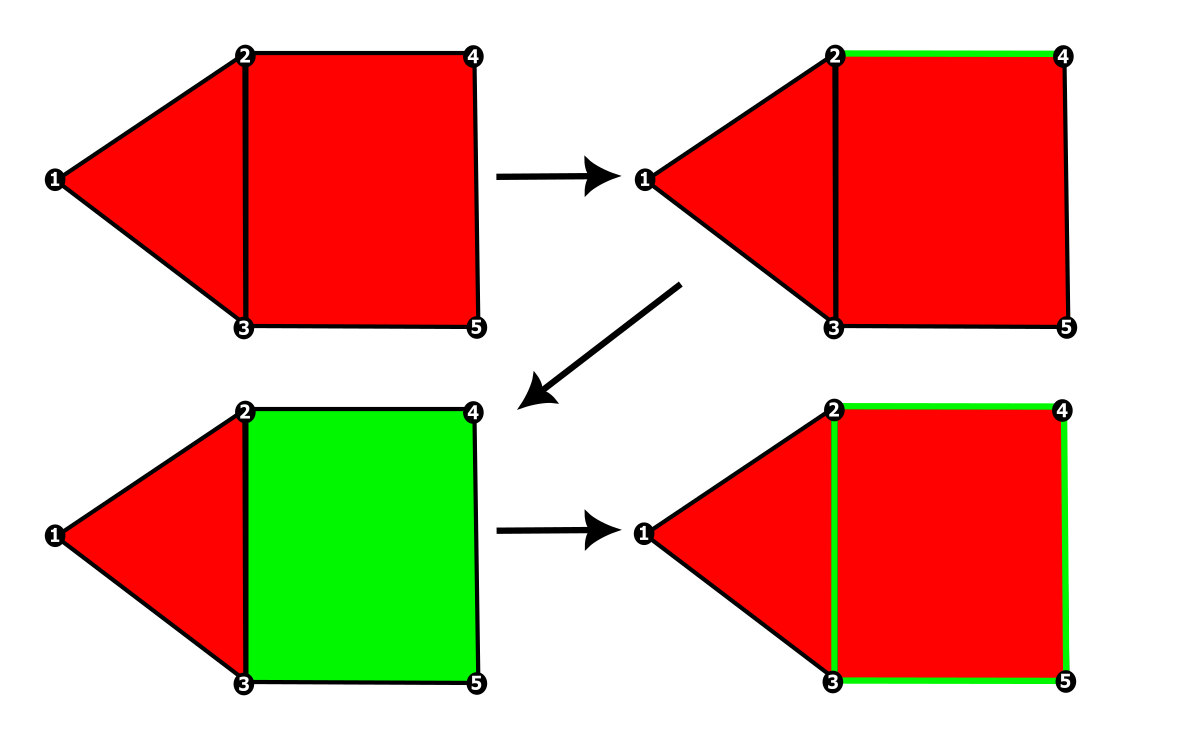

In [5]:
laplacian_up_1 = example_2.up_laplacian_matrix(rank=1).todense()
print(laplacian_up_1)

[[ 1. -1.  1.  0.  0.  0.]
 [-1.  1. -1.  0.  0.  0.]
 [ 1. -1.  2. -1.  1. -1.]
 [ 0.  0. -1.  1. -1.  1.]
 [ 0.  0.  1. -1.  1. -1.]
 [ 0.  0. -1.  1. -1.  1.]]


Looking at the printed up-Laplacian matrix there are a few things we can note to understand more about the information it is conveying.

The diagonal of the up-Laplacian matrix describes how many 2-cells are incident to that edge. This means that the element $[j,j]$ is how many 2-cells are incident to the j$^{th}$ edge. 

Looking at the matrix, we can see that the 0$^{th}$ row has non-zero elements in the 0$^{th}$, 1$^{st}$ and 2$^{nd}$ places, this shows that the 0$^{th}$ edge $[1,2]$ is incident via a 2-cell to the edges $[1,2], [1,3], [2,3]$, which are the 0$^{th}$, 1$^{st}$ and 2$^{nd}$ edges from our incidence matrix.

An up-Laplacian can have ranks of 0 and 1 because we can go 'up' from vertices for rank 0 and 'up' from edges for rank 1, but we cannot go 'up' from 2-cells. 

In [6]:
up_laplacian_0 = example_2.up_laplacian_matrix(rank=0).todense()
print(up_laplacian_0)

[[ 2. -1. -1.  0.  0.]
 [-1.  3. -1. -1.  0.]
 [-1. -1.  3.  0. -1.]
 [ 0. -1.  0.  2. -1.]
 [ 0.  0. -1. -1.  2.]]


This is the up-Laplacian of rank 0. This is looking 'up' from each vertex to its adjacent edges and then outputting the adjacent vertices to those edges. As example_2 has 5 vertices, this is a 5x5 matrix. 

## down-Laplacian

### Definition of down-Laplacian

<ins>*Rank 1:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of 1-cells in the cell complex.

For i $\neq$ j,

$\mathcal{L}_{down}(i,j)$ = 0 if the i$^{th}$ 1-cell is not incident to j$^{th}$ 1-cell via a 0-cell incident to i$^{th}$ 1-cell, $\neq$ 0 if it is incident.

For i = j, 

$\mathcal{L}_{down}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ 1-cell is incident to n 0-cells. 

<ins>*Rank 2:*</ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of 2-cells in the cell complex.

For i $\neq$ j,

$\mathcal{L}_{down}(i,j)$ = 0 if the i$^{th}$ 2-cell is not incident to j$^{th}$ 2-cell via a 1-cell incident to i$^{th}$ 2-cell, $\neq$ 0 if it is incident.

For i = j, 

$\mathcal{L}_{down}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ 2-cell is incident to n 1-cells. 

### Example of down-Laplacian

Looking at the diagram below we can follow the process of the down-Laplacian operator, this is an down-Laplacian of dimension 1 as it is going from edges to vertices back to edges.

Similarly to the up-Laplacian, we choose an edge - in this case we have chosen the edge $[2,4]$. From the incidence matrix above, we know that this edge is edge 3. Next, we go 'down' to the next dimension, of any vertices that are incident to this edge. In this case, it is incident to the verticies $2,4$. Finally, we list the edges incident to the verticies $2,4$ which are the edges $[1,2], [2,3], [2,4], [4,5]$. From the incidence matrix above we know that these are the edges 0, 2, 3, 5. 

This is seen in the matrix below titled `down_laplacian_1`, as the third row is referring to our edge $[2,4]$ and we can see there are non-zero elements in the 0$^{th}$, 2$^{nd}$, 3$^{rd}$ and 5$^{th}$ entries of this row as those are the edges incident via the down-Laplacian. 

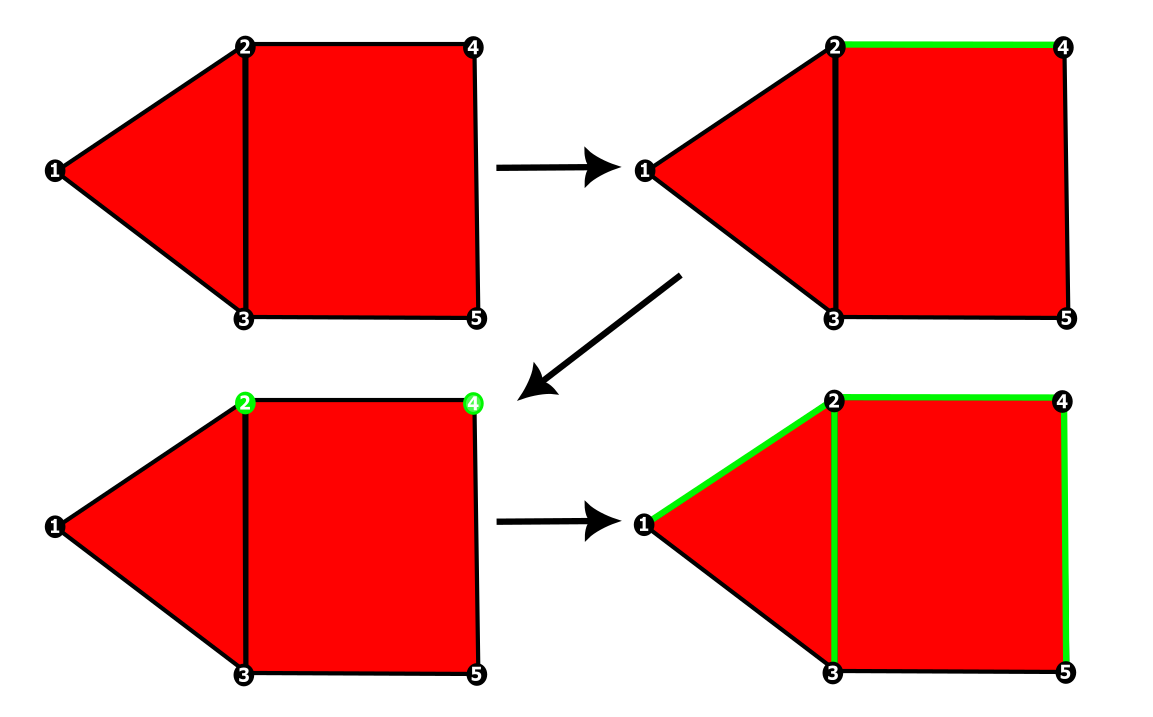

In [7]:
down_laplacian_1 = example_2.down_laplacian_matrix(rank=1).todense()
print(down_laplacian_1)

[[ 2.  1. -1. -1.  0.  0.]
 [ 1.  2.  1.  0. -1.  0.]
 [-1.  1.  2.  1. -1.  0.]
 [-1.  0.  1.  2.  0. -1.]
 [ 0. -1. -1.  0.  2.  1.]
 [ 0.  0.  0. -1.  1.  2.]]


Looking at the 0$^{th}$ row of this matrix, we can see that there are 4 non-zero entries in this row. This correlates to the example above as this row is representing the edge $[1,2]$. The non-zero entries relate to the edges that are numbered 0, 1, 2, 3 - in this case those are the edges $[1,2], [1,3], [2,3], [2,4]$. 

The diagonal of this matrix is similiar to that of the up-Laplacian but instead describes how many objects of the dimension below it is incident to, so in this example the element $[j,j]$ describes how many vertices the j$^{th}$ element is incident to. 

A down-Laplacian can have ranks 1 and 2, this is because you can go 'down' to vertices from edges and 'down' to edges from 2-cells. However, there is nowhere to go 'down' to from vertices. 

## Hodge Laplacian

### Defintion of Hodge Laplacian

Hodge Laplacian matrix has entry $\mathcal{L}_p(i,j)$, made from up-Laplacian values $\mathcal{L}_{up}(i, j)$ and down-Laplacian values $\mathcal{L}_{down}(i, j)$ such that

$\mathcal{L}_p(i,j)$ = $\mathcal{L}_{up}(i, j)$ + $\mathcal{L}_{down}(i, j)$. 

That is, any entry $(i,j)$ in the Hodge Laplacian matrix is generated by the addition of the equivalent $(i,j)$ values in the up-Laplacian and down-Laplacian matrices. 

### Relation of Hodge Laplacian to up-Laplacian and down-Laplacian

From our definition of Hodge Laplacian, and given what we know about up-Laplacian and down-Laplacian, it may cause us to think about the fact that up-Laplacian only has ranks of 0 and 1 and that down-Laplacian only has ranks of 1 and 2. This means that when we are finding the Hodge Laplacian of rank 0, there are no $\mathcal{L}_{down}(i, j)$  values to be added to $\mathcal{L}_p(i,j)$. Similarly, for a Hodge Laplacian of rank 2, there are no $\mathcal{L}_{up}(i, j)$ values to be added to $\mathcal{L}_p(i,j)$. This leads to the following:

Hodge Laplacian rank 0: $\mathcal{L}_p(i,j)$ = $\mathcal{L}_{up}(i, j)$

Hodge Laplacian rank 1: $\mathcal{L}_p(i,j)$ = $\mathcal{L}_{up}(i, j)$ + $\mathcal{L}_{down}(i, j)$

Hodge Laplacian rank 2: $\mathcal{L}_p(i,j)$ = $\mathcal{L}_{down}(i, j)$. 

In [8]:
hodge_laplacian_0 = example_2.hodge_laplacian_matrix(rank=0).todense()
print(hodge_laplacian_0)

[[ 2. -1. -1.  0.  0.]
 [-1.  3. -1. -1.  0.]
 [-1. -1.  3.  0. -1.]
 [ 0. -1.  0.  2. -1.]
 [ 0.  0. -1. -1.  2.]]


This is the Hodge Laplacian matrix of rank 0 for 'example_2'. From our definition of Hodge Laplacian we know that this is just the up-Laplacian matrix of rank 0, and by directly comparing it to the up-Laplacian matrix above confirms this. 

In [9]:
hodge_laplacian_1 = example_2.hodge_laplacian_matrix(rank=1).todense()
print(hodge_laplacian_1)

[[ 3.  0.  0. -1.  0.  0.]
 [ 0.  3.  0.  0. -1.  0.]
 [ 0.  0.  4.  0.  0. -1.]
 [-1.  0.  0.  3. -1.  0.]
 [ 0. -1.  0. -1.  3.  0.]
 [ 0.  0. -1.  0.  0.  3.]]


This is the Hodge Laplacian matrix of rank 1, which is the addition of the up-Laplacian and down-Laplacian matrices of rank 1. 

Take entry $[0,0]$ which has a value of 3. This is because the down-Laplacian of rank 1 has a value of 2 and the up-Laplacian of rank 1 has a value of 1 for the $[0,0]$ entry. 

In [10]:
hodge_laplacian_2 = example_2.hodge_laplacian_matrix(rank=2).todense()
print(hodge_laplacian_2)

[[ 3. -1.]
 [-1.  4.]]


This is the Hodge Laplacian matrix of rank 2, which is the same as the down-Laplacian matrix of rank 2. This is the smallest size matrix because it is based off of 2-cells, and example_2 only has two 2-cells resulting in a 2x2 matrix.

## References

$[1]$ : Hajij, M., Istvan, K. and Zamzmi, G. (n.d.). *CELL COMPLEX NEURAL NETWORKS*. [online] Available at: https://arxiv.org/pdf/2010.00743.pdf [Accessed 10 Feb. 2023].

$[2]$ : Roddenberry, T., Schaub, M. and Hajij, M. (n.d.). *SIGNAL PROCESSING ON CELL COMPLEXES*. [online] Available at: https://arxiv.org/pdf/2110.05614v2.pdf [Accessed 17 Mar. 2023].

$[3]$ : www.scientificlib.com. (n.d.). *Incidence matrix*. [online] Available at: http://www.scientificlib.com/en/Mathematics/LX/IncidenceMatrix.html. [Accessed 3 Jan. 2023].

$[4]$ : Computational Topology (Jeff Erickson) *Cell Complexes: Definitions*. (n.d.). Available at: https://jeffe.cs.illinois.edu/teaching/comptop/2009/notes/cell-complexes.pdf [Accessed 17 Mar. 2023].

